# TRABAJO INTEGRADOR - DATA SCIENCE - 2022
## Tema: Créditos Prendarios

**Los objetivos identificados del negocio son los siguientes:**

- **Objetivo 1**: Controlar la mora, a través de la adjudicación de la joya y el entendimiento de sus clientes, mediante una solución analítica.
- **Objetivo 2**: Entender el comportamiento de los clientes con el fin de que la entidad pueda generar ofertas diferenciadas, mediante una solución analítica.

```

```


![Imagen](Portada.jpg)

Link del word del trabajo integrador: [Trabajo integrador](https://1drv.ms/u/s!At02E1M_3GSWdJJzazWgNuB7BO4?e=DMR1b5)


## 1. Explorando los datos de los créditos prendarios

```
```
- *Vamos a instalar los paquetes de Python que se requeriran en el presente trabajo*


In [1]:
#pip install pyreadstat 

In [2]:
#pip install pyprojroot

- *Instalaremos las librerias y se iniciara con el la exploración de los datos.*

In [3]:
#importamos librerias
import pyreadstat
import pandas as pd
from pyprojroot import here 
#from time import time, ctime
import datetime
#from janitor import clean_names
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Cargando la data, se han creado rutas para cuando se quiera correr en diferentes ordenadores:
#--------------------------------------------------------------------------------------------------------------------------------

#data, meta = pyreadstat.read_sav(here('D:\DATA SCIENCE\SESIONES\PROYECTO INTEGRADOR\Proyecto_Integrador') / "Input/Credito prendario.sav")
data, meta = pyreadstat.read_sav(here() / "Input/Credito prendario.sav")
#data, meta = pyreadstat.read_sav(here('C:\\Users\ANALISTAUP29\\Documents\\Proyecto_Integrador') / "Input/Credito prendario.sav")

#---------------------------------------------------------------------------------------------------------------------------------

In [5]:
#revisando un caso aleatorio
#data = data[data.CodCli == 1090300005568]

In [6]:
# Nos quedaremos con los registros del último mes antes del 12 del 2019, esto con el fin de tomar como data nueva la info del
# periodo del 12 del 2019.

data=data[data.Periodo != 201912] #max de periodo
data.head()

,Periodo,CodCli,Edad,Sexo,EstaCiv,TipoViv,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,FlagAtra,MaxDiasAtra,MaxGramOro,FechAnalisis,AntiDias,FlagAdj
0,200705.0,1.090300e+12,69.0,1.0,1.0,1.0,2.0,2613.74,2549.54,2736.90,551.0,2690.89,0.0,6.0,45.4166,1.341369e+10,220.0,0.0
1,200705.0,1.090300e+12,55.0,0.0,5.0,4.0,2.0,2782.07,1488.64,3051.00,1327.0,1790.80,0.0,33.0,50.6250,1.341619e+10,233.0,0.0
2,200705.0,1.090300e+12,55.0,0.0,1.0,4.0,1.0,1407.21,1205.06,1473.52,1645.0,4315.00,0.0,28.0,24.4500,1.342328e+10,327.0,0.0
3,200705.0,1.090300e+12,61.0,0.0,1.0,4.0,2.0,658.70,429.95,1095.28,424.0,399.62,1.0,28.0,12.4500,1.340729e+10,127.0,1.0
4,200705.0,1.090300e+12,59.0,0.0,5.0,4.0,2.0,2162.62,2148.78,2264.52,1213.0,1642.20,0.0,46.0,37.5750,1.342051e+10,275.0,0.0


In [7]:
#Mirando las variables y algunos datos de la base
data.head()

,Periodo,CodCli,Edad,Sexo,EstaCiv,TipoViv,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,FlagAtra,MaxDiasAtra,MaxGramOro,FechAnalisis,AntiDias,FlagAdj
0,200705.0,1.090300e+12,69.0,1.0,1.0,1.0,2.0,2613.74,2549.54,2736.90,551.0,2690.89,0.0,6.0,45.4166,1.341369e+10,220.0,0.0
1,200705.0,1.090300e+12,55.0,0.0,5.0,4.0,2.0,2782.07,1488.64,3051.00,1327.0,1790.80,0.0,33.0,50.6250,1.341619e+10,233.0,0.0
2,200705.0,1.090300e+12,55.0,0.0,1.0,4.0,1.0,1407.21,1205.06,1473.52,1645.0,4315.00,0.0,28.0,24.4500,1.342328e+10,327.0,0.0
3,200705.0,1.090300e+12,61.0,0.0,1.0,4.0,2.0,658.70,429.95,1095.28,424.0,399.62,1.0,28.0,12.4500,1.340729e+10,127.0,1.0
4,200705.0,1.090300e+12,59.0,0.0,5.0,4.0,2.0,2162.62,2148.78,2264.52,1213.0,1642.20,0.0,46.0,37.5750,1.342051e+10,275.0,0.0


In [8]:
#Información de las variables, para ver si existen nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957214 entries, 0 to 957213
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Periodo         957214 non-null  float64
 1   CodCli          957214 non-null  float64
 2   Edad            957214 non-null  float64
 3   Sexo            957214 non-null  float64
 4   EstaCiv         957214 non-null  float64
 5   TipoViv         957214 non-null  float64
 6   CantCred        957214 non-null  float64
 7   Desem           957214 non-null  float64
 8   SalVigSol       957214 non-null  float64
 9   Monto_Tasación  957214 non-null  float64
 10  DiasEfec        957214 non-null  float64
 11  MaxDeuda        957214 non-null  float64
 12  FlagAtra        957214 non-null  float64
 13  MaxDiasAtra     957214 non-null  float64
 14  MaxGramOro      957214 non-null  float64
 15  FechAnalisis    957214 non-null  float64
 16  AntiDias        957214 non-null  float64
 17  FlagAdj   

In [9]:
# No hay no nulos

In [10]:
#Diccionario
'''

Periodo	Periodo
CodCli	Código de Cliente
Edad	Edad
Sexo	Sexo
EstaCiv	Estado civil
TipoViv	Tipo de vivienda
CantCred	Cantidad de créditos
Desem	Desembolso
SalVigSol	Saldo vigente en soles
Monto_Tasación	Monto de tasación
DiasEfec	Dias efectivos
MaxDeuda	Máxima deuda
FlagAtra	Flag de dias de atraso
MaxDiasAtra	Maximo dias de atraso
MaxGramOro	Maximo gramo en oro
FechAnalisis	Fecha de analisis
AntiDias	Antiguedad en dias
FlagAdj	Falg adjudicación

'''

'\n\nPeriodo\tPeriodo\nCodCli\tCódigo de Cliente\nEdad\tEdad\nSexo\tSexo\nEstaCiv\tEstado civil\nTipoViv\tTipo de vivienda\nCantCred\tCantidad de créditos\nDesem\tDesembolso\nSalVigSol\tSaldo vigente en soles\nMonto_Tasación\tMonto de tasación\nDiasEfec\tDias efectivos\nMaxDeuda\tMáxima deuda\nFlagAtra\tFlag de dias de atraso\nMaxDiasAtra\tMaximo dias de atraso\nMaxGramOro\tMaximo gramo en oro\nFechAnalisis\tFecha de analisis\nAntiDias\tAntiguedad en dias\nFlagAdj\tFalg adjudicación\n\n'

In [11]:
# Obtener variables númericas:
num_cols = [i for i in data.columns 
            if ((data[i].dtype == float) | (data[i].dtype == np.int64))]

print(num_cols)

['Periodo', 'CodCli', 'Edad', 'Sexo', 'EstaCiv', 'TipoViv', 'CantCred', 'Desem', 'SalVigSol', 'Monto_Tasación', 'DiasEfec', 'MaxDeuda', 'FlagAtra', 'MaxDiasAtra', 'MaxGramOro', 'FechAnalisis', 'AntiDias', 'FlagAdj']


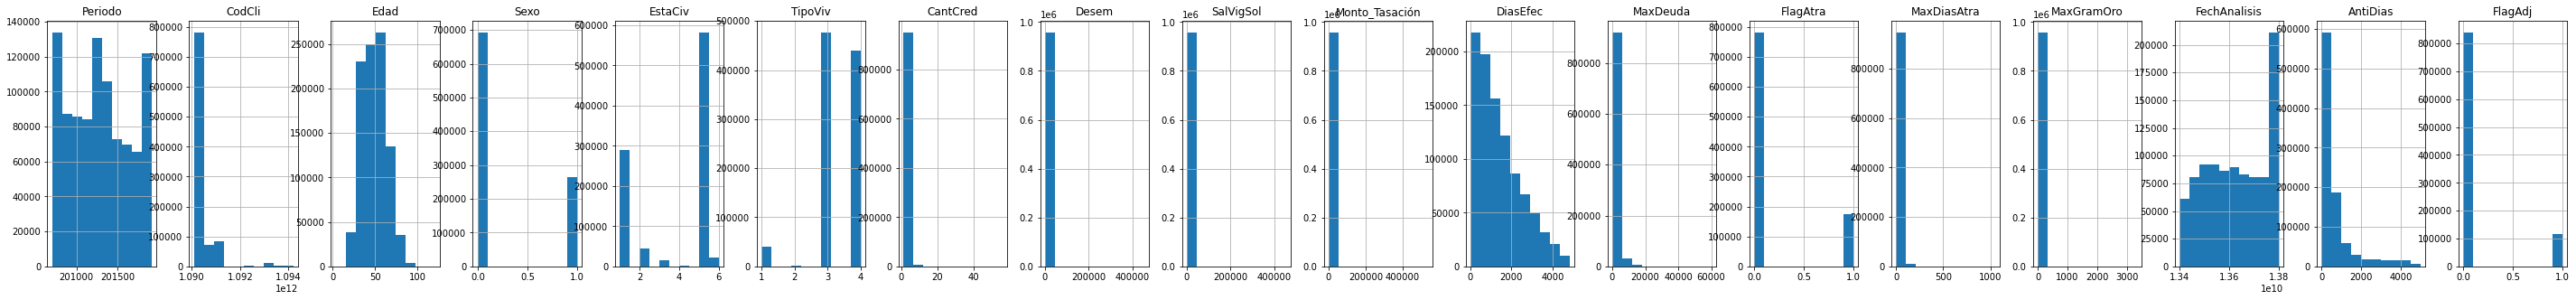

In [12]:
# Realizamos algunos gráficos para tener un panorama general de la data que se trabjara.

plt.rcParams['figure.figsize'] = [50,5] 
data[num_cols].hist(layout = (1,18))
plt.show()
plt.rcParams['figure.figsize'] = [6.4, 4.8] 

**En la siguiente tabla se identifican datos atipicos e incosistentes, los cuales procderemos a corregir en las siguientes lineas**

Por ejemplo:

Edad mínima es de : 4 años
Desembolso igual a 0


In [13]:
# Analizando algunos estadisticos de las variables que conforman la base de datos:
data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
Periodo,957214.00,201283.66,356.69,200705.00,201003.00,201301.00,201604.00,201911.00
CodCli,957214.00,1090326607820.18,492946058.88,1090100000043.00,1090100339873.00,1090100828475.00,1090400019500.00,1094200000159.00
Edad,957214.00,49.34,14.00,4.00,38.00,49.00,59.00,121.00
Sexo,957214.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
EstaCiv,957214.00,3.64,1.87,1.00,1.00,5.00,5.00,6.00
TipoViv,957214.00,3.37,0.70,1.00,3.00,3.00,4.00,4.00
CantCred,957214.00,1.46,1.09,1.00,1.00,1.00,2.00,56.00
Desem,957214.00,1318.91,2245.71,0.00,401.88,764.15,1494.07,455218.04
SalVigSol,957214.00,1139.53,2100.38,0.00,323.97,629.18,1273.55,455218.04
Monto_Tasación,957214.00,1533.83,2538.83,48.60,475.00,897.00,1740.00,535552.80


In [14]:
#Para agregar porcentajes

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

'\n1: La caja se adjudica la joya (Se queda con el bien del cliente)  -->  87.8%\n0: La caja no se adjudica la joya (Devuelve el bien al cliente)  -->    12.2%\n\n'

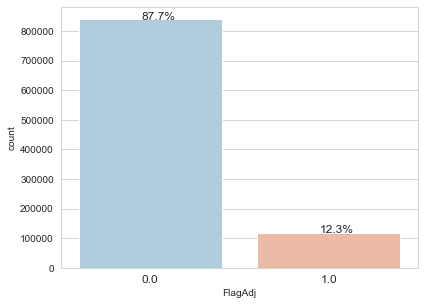

In [15]:
# Analizando la variable que representa el Tarjet del negocio (FlagAdj)

sns.set_style('whitegrid')
ax=sns.countplot(x='FlagAdj',data=data,palette='RdBu_r')

plt.xticks(size=12)

without_hue(ax,data.FlagAdj)

'''
1: La caja se adjudica la joya (Se queda con el bien del cliente)  -->  87.8%
0: La caja no se adjudica la joya (Devuelve el bien al cliente)  -->    12.2%

'''


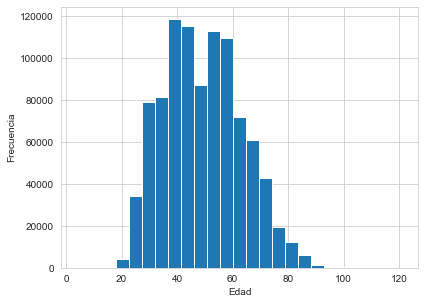

In [16]:
# Analizando la Edad

data['Edad'].hist(bins=25) 
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


<AxesSubplot:xlabel='Edad'>

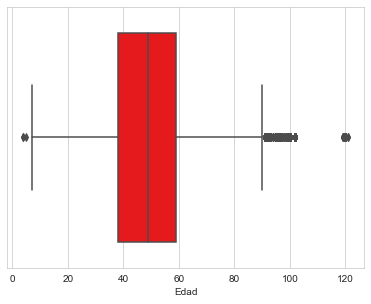

In [17]:
sns.boxplot(x="Edad",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [18]:
 #Intervalo de cantidad de edad
import math

k = 1 + 3.322 * math.log10(len(data['Edad']))
periodos = math.ceil(k)

inf = data['Edad'].min()        # Limite inferior del primer intervalo
dif = data['Edad'].max()
sup = data['Edad'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['Edad'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[4.0, 9.85)",21,6.925,4.00,9.85
"[9.85, 15.7)",28,12.775,9.85,15.70
"[15.7, 21.549999999999997)",2692,18.625,15.70,21.55
"[21.549999999999997, 27.4)",35957,24.475,21.55,27.40
"[27.4, 33.25)",97617,30.325,27.40,33.25
"[33.25, 39.099999999999994)",132767,36.175,33.25,39.10
"[39.099999999999994, 44.949999999999996)",117030,42.025,39.10,44.95
"[44.949999999999996, 50.8)",133099,47.875,44.95,50.80
"[50.8, 56.65)",134670,53.725,50.80,56.65


'\n#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO\n'

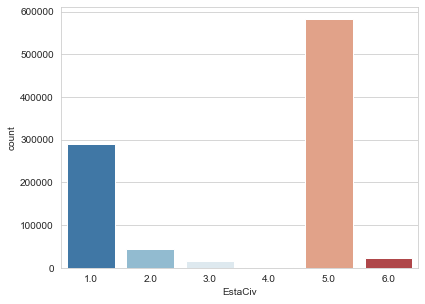

In [19]:
# EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
sns.set_style('whitegrid')
sns.countplot(x='EstaCiv',data=data,palette='RdBu_r')

'''
#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
'''


'\n#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO\n'

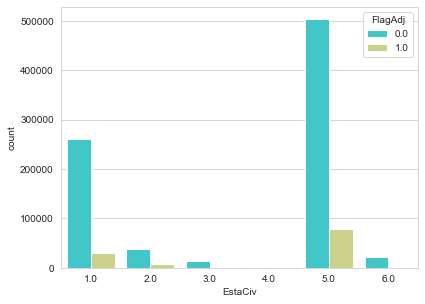

In [20]:
# Analisis de Estado civil vs Adjudicación de la Joya

sns.set_style('whitegrid')
sns.countplot(x='EstaCiv',hue='FlagAdj',data=data,palette='rainbow')


'''
#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
'''


'\nTipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA\n'

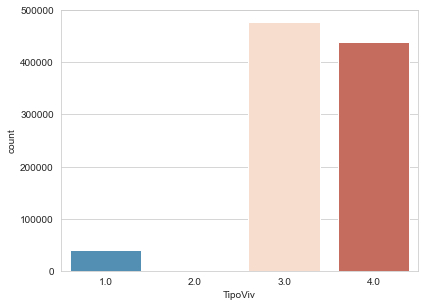

In [21]:
# TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
sns.set_style('whitegrid')
sns.countplot(x='TipoViv',data=data,palette='RdBu_r')

'''
TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
'''


'\nTipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA\n'

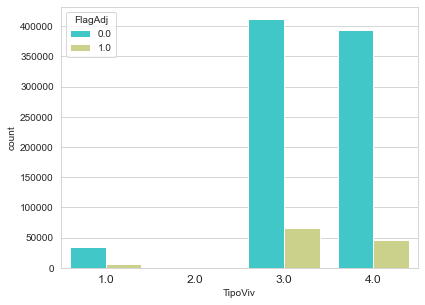

In [22]:
# Analisis de tipo de vivienda vs Adjudicación de la Joya

sns.set_style('whitegrid')
ax=sns.countplot(x='TipoViv',hue='FlagAdj',data=data,palette='rainbow')

plt.xticks(size=12)

'''
TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
'''


<AxesSubplot:xlabel='Sexo', ylabel='count'>

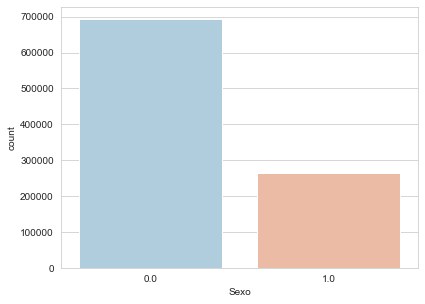

In [23]:
# Sexo 0: Mujer, 1: Hombre
sns.set_style('whitegrid')
sns.countplot(x='Sexo',data=data,palette='RdBu_r')

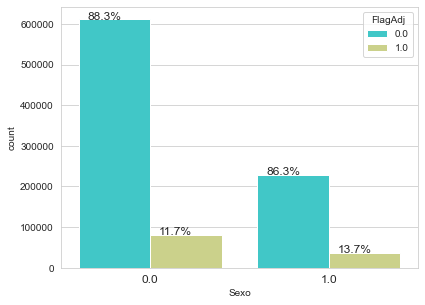

In [24]:
# Analisis Sexo vs Adjudicación de la Joya

sns.set_style('whitegrid')
ax= sns.countplot(x='Sexo',hue='FlagAdj',data=data,palette='rainbow')

'''
1: Hombre
0: Mujer
'''

plt.xticks(size=12)

with_hue(ax,data.Sexo,2,2)

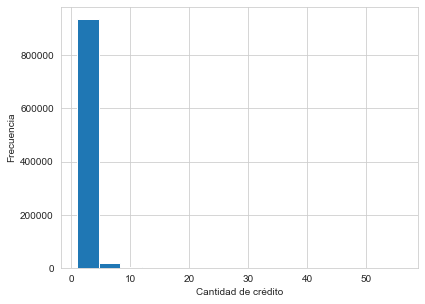

In [25]:
# Analizando la Cantidad de Credito (CantCred)

#sns.distplot(data['CantCred'].dropna(),kde=False,color='darkred',bins=80)

data['CantCred'].hist(bins=15) 
plt.xlabel("Cantidad de crédito")
plt.ylabel("Frecuencia")
plt.show()



<AxesSubplot:xlabel='CantCred'>

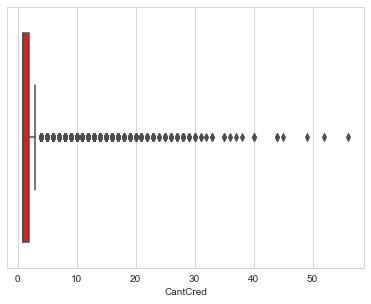

In [26]:
# Gráfico de caja:

sns.boxplot(x="CantCred",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")


In [27]:
 #Intervalo de cantidad de credito
import math

k = 1 + 3.322 * math.log10(len(data['CantCred']))
periodos = math.ceil(k)

inf = data['CantCred'].min()        # Limite inferior del primer intervalo
dif = data['CantCred'].max()
sup = data['CantCred'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['CantCred'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[1.0, 3.75)",914470,2.375,1.00,3.75
"[3.75, 6.5)",35673,5.125,3.75,6.50
"[6.5, 9.25)",5188,7.875,6.50,9.25
"[9.25, 12.0)",1090,10.625,9.25,12.00
"[12.0, 14.75)",501,13.375,12.00,14.75
"[14.75, 17.5)",151,16.125,14.75,17.50
"[17.5, 20.25)",49,18.875,17.50,20.25
"[20.25, 23.0)",20,21.625,20.25,23.00
"[23.0, 25.75)",21,24.375,23.00,25.75


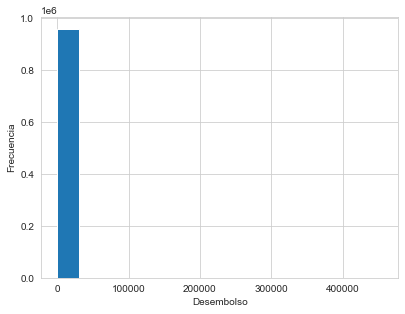

In [28]:
# Analizando el desembolso (Desem)

#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['Desem'].hist(bins=15) 
plt.xlabel("Desembolso")
plt.ylabel("Frecuencia")
plt.show()


<AxesSubplot:xlabel='Desem'>

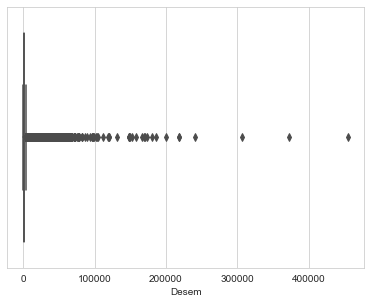

In [29]:
sns.boxplot(x="Desem",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [30]:
# Intervalo de Desem
import math

k = 1 + 3.322 * math.log10(len(data['Desem']))
periodos = math.ceil(k)

inf = data['Desem'].min()        # Limite inferior del primer intervalo
dif = data['Desem'].max()
sup = data['Desem'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['Desem'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 22760.902)",956234,11380.451,0.000,22760.902
"[22760.902, 45521.804)",807,34141.353,22760.902,45521.804
"[45521.804, 68282.70599999999)",121,56902.255,45521.804,68282.706
"[68282.70599999999, 91043.608)",19,79663.157,68282.706,91043.608
"[91043.608, 113804.51)",10,102424.059,91043.608,113804.510
"[113804.51, 136565.41199999998)",4,125184.961,113804.510,136565.412
"[136565.41199999998, 159326.31399999998)",6,147945.863,136565.412,159326.314
"[159326.31399999998, 182087.216)",5,170706.765,159326.314,182087.216
"[182087.216, 204848.118)",2,193467.667,182087.216,204848.118


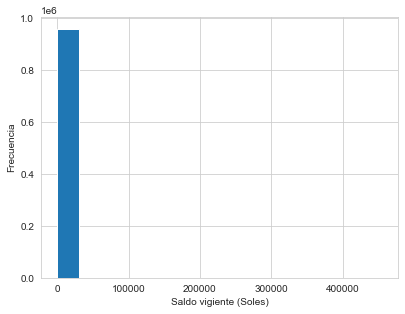

In [31]:
# Analizando el Saldo vigiente (SalVigSol)

#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['SalVigSol'].hist(bins=15) 
plt.xlabel("Saldo vigiente (Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='SalVigSol'>

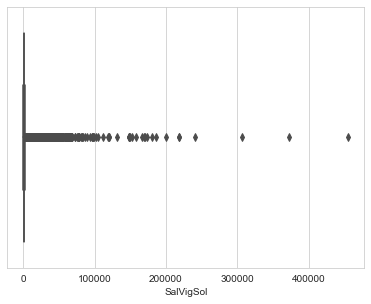

In [32]:
sns.boxplot(x="SalVigSol",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [33]:
# Intervalo de Saldo vigiente
import math


k = 1 + 3.322 * math.log10(len(data['SalVigSol']))
periodos = math.ceil(k)

inf = data['SalVigSol'].min()        # Limite inferior del primer intervalo
dif = data['SalVigSol'].max()
sup = data['SalVigSol'].max()   # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['SalVigSol'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 22760.902)",956407,11380.451,0.000,22760.902
"[22760.902, 45521.804)",661,34141.353,22760.902,45521.804
"[45521.804, 68282.70599999999)",98,56902.255,45521.804,68282.706
"[68282.70599999999, 91043.608)",16,79663.157,68282.706,91043.608
"[91043.608, 113804.51)",9,102424.059,91043.608,113804.510
"[113804.51, 136565.41199999998)",4,125184.961,113804.510,136565.412
"[136565.41199999998, 159326.31399999998)",6,147945.863,136565.412,159326.314
"[159326.31399999998, 182087.216)",5,170706.765,159326.314,182087.216
"[182087.216, 204848.118)",2,193467.667,182087.216,204848.118


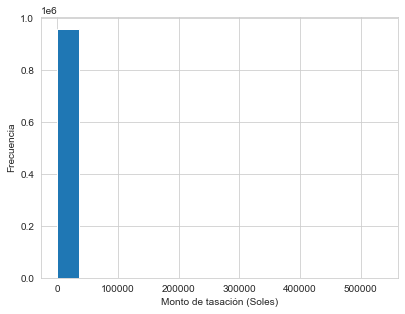

In [34]:
# Analizando el Monto de tasación
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['Monto_Tasación'].hist(bins=15) 
plt.xlabel("Monto de tasación (Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='Monto_Tasación'>

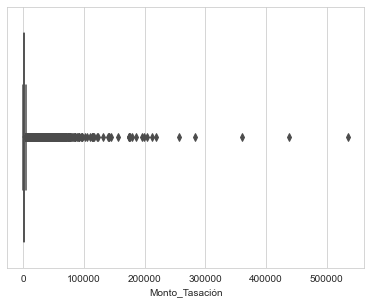

In [35]:
sns.boxplot(x="Monto_Tasación",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [36]:
# Intervalo de monto de tasación
import math


k = 1 + 3.322 * math.log10(len(data['Monto_Tasación']))
periodos = math.ceil(k)

inf = data['Monto_Tasación'].min()       # Limite inferior del primer intervalo
dif = data['Monto_Tasación'].max()
sup = data['Monto_Tasación'].max()    # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['Monto_Tasación'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[48.6, 26823.809999999998)",956428,13436.205,48.60,26823.81
"[26823.809999999998, 53599.02)",646,40211.415,26823.81,53599.02
"[53599.02, 80374.23000000001)",90,66986.625,53599.02,80374.23
"[80374.23000000001, 107149.44)",20,93761.835,80374.23,107149.44
"[107149.44, 133924.65)",9,120537.045,107149.44,133924.65
"[133924.65, 160699.86000000002)",5,147312.255,133924.65,160699.86
"[160699.86000000002, 187475.07)",6,174087.465,160699.86,187475.07
"[187475.07, 214250.28)",4,200862.675,187475.07,214250.28
"[214250.28, 241025.49)",1,227637.885,214250.28,241025.49


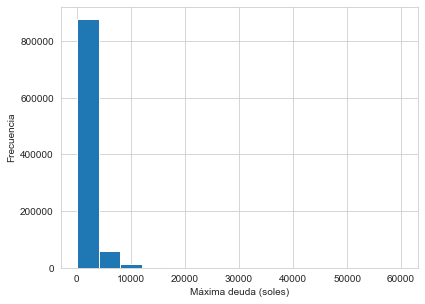

In [37]:
# Analizando maxima deunda
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['MaxDeuda'].hist(bins=15) 
plt.xlabel("Máxima deuda (soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='MaxDeuda'>

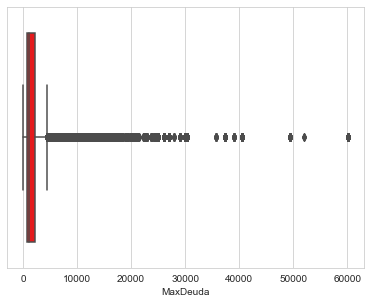

In [38]:
sns.boxplot(x="MaxDeuda",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [39]:
# Intervalo de maxima deuda
import math


k = 1 + 3.322 * math.log10(len(data['MaxDeuda']))
periodos = math.ceil(k)

inf = data['MaxDeuda'].min()       # Limite inferior del primer intervalo
dif = data['MaxDeuda'].max()
sup = data['MaxDeuda'].max()    # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['MaxDeuda'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[50.0, 3053.525)",822634,1551.7625,50.000,3053.525
"[3053.525, 6057.05)",96997,4555.2875,3053.525,6057.050
"[6057.05, 9060.575)",20203,7558.8125,6057.050,9060.575
"[9060.575, 12064.1)",10533,10562.3375,9060.575,12064.100
"[12064.1, 15067.625)",4019,13565.8625,12064.100,15067.625
"[15067.625, 18071.15)",1063,16569.3875,15067.625,18071.150
"[18071.15, 21074.675)",521,19572.9125,18071.150,21074.675
"[21074.675, 24078.2)",234,22576.4375,21074.675,24078.200
"[24078.2, 27081.725000000002)",516,25579.9625,24078.200,27081.725


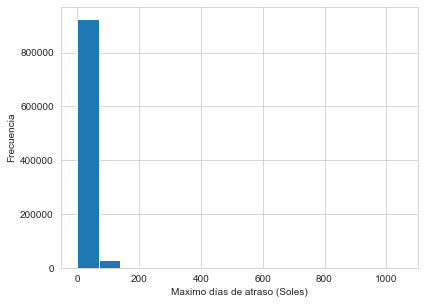

In [40]:
# Analizando maximo dias de atraso
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['MaxDiasAtra'].hist(bins=15) 
plt.xlabel("Maximo días de atraso (Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='MaxDiasAtra'>

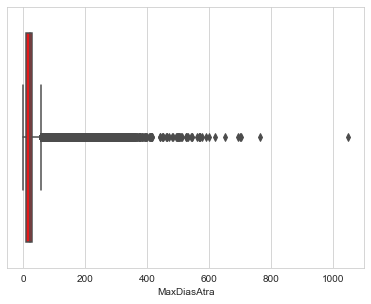

In [41]:
sns.boxplot(x="MaxDiasAtra",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [42]:
# Intervalo de maxima dias de atraso
import math


k = 1 + 3.322 * math.log10(len(data['MaxDiasAtra']))
periodos = math.ceil(k)

inf = data['MaxDiasAtra'].min()       # Limite inferior del primer intervalo
dif = data['MaxDiasAtra'].max()
sup = data['MaxDiasAtra'].max()      # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['MaxDiasAtra'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.0, 52.5)",888859,26.25,0.0,52.5
"[52.5, 105.0)",57861,78.75,52.5,105.0
"[105.0, 157.5)",7967,131.25,105.0,157.5
"[157.5, 210.0)",1666,183.75,157.5,210.0
"[210.0, 262.5)",522,236.25,210.0,262.5
"[262.5, 315.0)",174,288.75,262.5,315.0
"[315.0, 367.5)",90,341.25,315.0,367.5
"[367.5, 420.0)",32,393.75,367.5,420.0
"[420.0, 472.5)",9,446.25,420.0,472.5


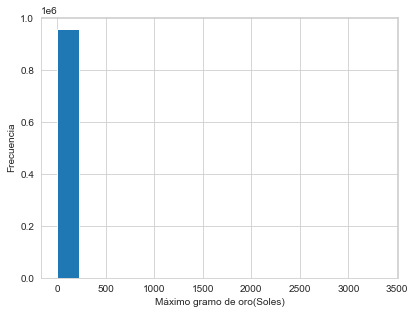

In [43]:
# Analizando maximo gramo de oro
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['MaxGramOro'].hist(bins=15) 
plt.xlabel("Máximo gramo de oro(Soles)")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='MaxGramOro'>

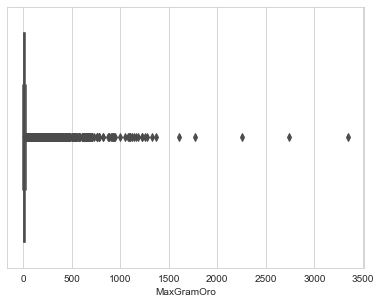

In [44]:
sns.boxplot(x="MaxGramOro",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [45]:
# Intervalo de maxima dias de atraso
import math


k = 1 + 3.322 * math.log10(len(data['MaxGramOro']))
periodos = math.ceil(k)

inf = data['MaxGramOro'].min()       # Limite inferior del primer intervalo
dif = data['MaxGramOro'].max()
sup = data['MaxGramOro'].max()     # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['MaxGramOro'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[0.45, 167.78775000000002)",955972,84.118875,0.45000,167.78775
"[167.78775000000002, 335.12550000000005)",1037,251.456625,167.78775,335.12550
"[335.12550000000005, 502.4632500000001)",94,418.794375,335.12550,502.46325
"[502.4632500000001, 669.8010000000002)",48,586.132125,502.46325,669.80100
"[669.8010000000002, 837.1387500000002)",28,753.469875,669.80100,837.13875
"[837.1387500000002, 1004.4765000000002)",14,920.807625,837.13875,1004.47650
"[1004.4765000000002, 1171.8142500000001)",9,1088.145375,1004.47650,1171.81425
"[1171.8142500000001, 1339.1520000000003)",6,1255.483125,1171.81425,1339.15200
"[1339.1520000000003, 1506.4897500000004)",1,1422.820875,1339.15200,1506.48975


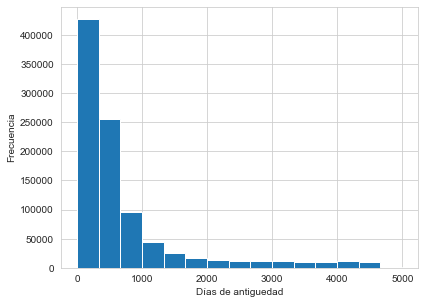

In [46]:
# Analizando días de antiguedad

data['AntiDias'].hist(bins=15) 
plt.xlabel("Días de antiguedad")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='AntiDias'>

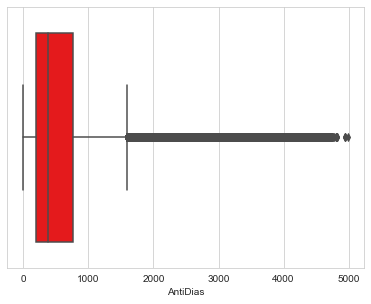

In [47]:
sns.boxplot(x="AntiDias",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [48]:
# Intervalo de maxima dias de antiguedad
import math


k = 1 + 3.322 * math.log10(len(data['AntiDias']))
periodos = math.ceil(k)

inf = data['AntiDias'].min()        # Limite inferior del primer intervalo
dif = data['AntiDias'].max()
sup = data['AntiDias'].max()  # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['AntiDias'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[1.0, 250.5)",312866,125.75,1.0,250.5
"[250.5, 500.0)",277864,375.25,250.5,500.0
"[500.0, 749.5)",123633,624.75,500.0,749.5
"[749.5, 999.0)",63097,874.25,749.5,999.0
"[999.0, 1248.5)",35524,1123.75,999.0,1248.5
"[1248.5, 1498.0)",22797,1373.25,1248.5,1498.0
"[1498.0, 1747.5)",16784,1622.75,1498.0,1747.5
"[1747.5, 1997.0)",12236,1872.25,1747.5,1997.0
"[1997.0, 2246.5)",10406,2121.75,1997.0,2246.5


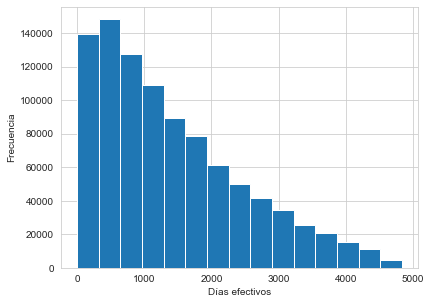

In [49]:
# Analizando días efectivos
#sns.distplot(data['Desem'].dropna(),kde=False,color='darkred',bins=25)

data['DiasEfec'].hist(bins=15) 
plt.xlabel("Días efectivos")
plt.ylabel("Frecuencia")
plt.show()

<AxesSubplot:xlabel='DiasEfec'>

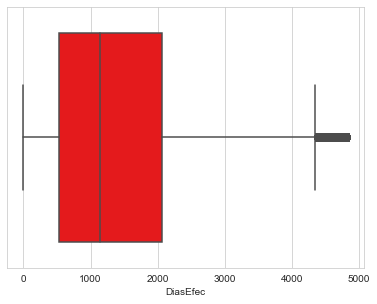

In [50]:
sns.boxplot(x="DiasEfec",data=data,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

In [51]:
# Intervalo de maxima dias efectivos
import math


k = 1 + 3.322 * math.log10(len(data['DiasEfec']))
periodos = math.ceil(k)

inf = data['DiasEfec'].min()        # Limite inferior del primer intervalo
dif = data['DiasEfec'].max()
sup = data['DiasEfec'].max()  # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

df = pd.DataFrame(index=intervals)
df['FreqAbs'] = pd.cut(data['DiasEfec'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
Intervalo,,,,
"[1.0, 242.65)",101526,121.825,1.00,242.65
"[242.65, 484.3)",116014,363.475,242.65,484.30
"[484.3, 725.95)",103128,605.125,484.30,725.95
"[725.95, 967.6)",94398,846.775,725.95,967.60
"[967.6, 1209.25)",83143,1088.425,967.60,1209.25
"[1209.25, 1450.9)",72764,1330.075,1209.25,1450.90
"[1450.9, 1692.55)",63540,1571.725,1450.90,1692.55
"[1692.55, 1934.2)",57994,1813.375,1692.55,1934.20
"[1934.2, 2175.85)",47853,2055.025,1934.20,2175.85


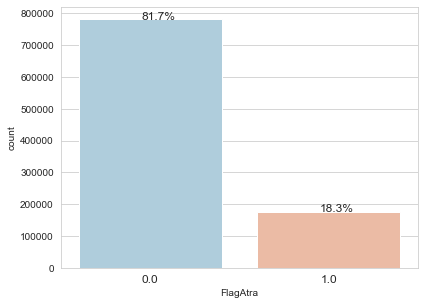

In [52]:
# Flag de atrasos

sns.set_style('whitegrid')
ax=sns.countplot(x='FlagAtra',data=data,palette='RdBu_r')

plt.xticks(size=12)

without_hue(ax,data.FlagAtra)

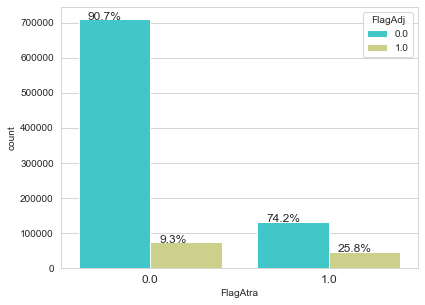

In [53]:
# Flag de atrasos vs flag de adjudicación

sns.set_style('whitegrid')
ax= sns.countplot(x='FlagAtra',hue='FlagAdj',data=data,palette='rainbow')

plt.xticks(size=12)

with_hue(ax,data.FlagAtra,2,2)

In [54]:
# Analizaremos el ratio de desembolso:

# No se debería de desembolsar mas del monto de tasación, es una regla de la Caja de creditos prendarios.

data['ratio_desem_tasa'] = data['Desem']/data['Monto_Tasación']

# data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio_desem_tasa'>

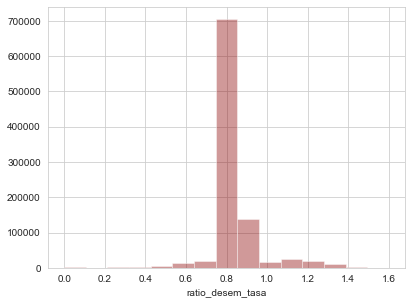

In [55]:
sns.distplot(data['ratio_desem_tasa'].dropna(),kde=False,color='darkred',bins=15)

Luego de analizar la data graficamente y con algunos indicadores, se evidencia incosistencia en los datos y datos atipos.

## 2. Transformando los datos



- *De la visulizaciín grafica y la revisión de las varaibles, se ha identificado datos atipicos den la base, por lo que se procedera a eliminarlos.*

    Las etiqueta de las variables son las siguientes:

    - Sexo 0: Mujer, 1: Hombre
    - EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
    - TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
    - FlagAdj 0: Pagó a tiempo y la caja no se adjudico el bien prendario, 1: La caja de adjudicó el bien prendario


In [56]:
data['max_cant_cred'] = data.groupby(['CodCli'])['CantCred'].transform(np.max)
data = data[data.max_cant_cred <=2 ]

In [57]:
'''
data['gg']=1
data['cliente_12m'] = data.groupby(['CodCli'])['gg'].transform(np.sum)
data = data[data.cliente_12m >12 ]
#Eliminando variables de no interés
del data['gg'],data['cliente_12m']
'''

"\ndata['gg']=1\ndata['cliente_12m'] = data.groupby(['CodCli'])['gg'].transform(np.sum)\ndata = data[data.cliente_12m >12 ]\n#Eliminando variables de no interés\ndel data['gg'],data['cliente_12m']\n"

In [58]:
data['CantCred'].value_counts()

1.0    571797
2.0     71168
Name: CantCred, dtype: int64

In [59]:
data['años']=data['Periodo']/100
data['años']=data['años'].apply(np.floor)
data['mes']=data['Periodo']%100
data['meses']=data['años']*12+data['mes']

In [60]:
#Eliminando variables de no interés
del data['años'],data['mes'],data['max_cant_cred']

In [61]:
data=data.sort_values(by=["CodCli", "Periodo"])

In [62]:
data=data.reset_index(drop=True)

In [63]:
data['meses_lag'] = data['meses'].shift(-1)

In [64]:
data['dif_time'] = data['meses_lag'] - data['meses']

In [65]:
data=data.replace(np.nan,1)

In [66]:
data['fin_cred_cli'] =1

In [67]:
data.loc[data.dif_time==1, 'fin_cred_cli'] = 0

In [68]:
data['fin_cred_cli'].value_counts()

0    566311
1     76654
Name: fin_cred_cli, dtype: int64

In [69]:
data['FlagAdj_nuevo']=data['FlagAdj']*data['fin_cred_cli']

In [70]:
data['cred_id']=np.nan

In [71]:
data.loc[0, 'cred_id'] = 1

In [72]:
for i in range(1, len(data)):
    data.loc[i, 'cred_id'] = data.loc[i-1, 'cred_id'] + data.loc[i, 'fin_cred_cli']    

In [73]:
data["cliente_cred_id"] = data["CodCli"].astype(str) + data["cred_id"].astype(str)

In [74]:
'''
data['gg']=1
data['cliente_cred_12m'] = data.groupby(['cliente_cred_id'])['gg'].transform(np.sum)
data = data[data.cliente_cred_12m >12 ]
#Eliminando variables de no interés
del data['gg'],data['cliente_cred_12m']
'''

"\ndata['gg']=1\ndata['cliente_cred_12m'] = data.groupby(['cliente_cred_id'])['gg'].transform(np.sum)\ndata = data[data.cliente_cred_12m >12 ]\n#Eliminando variables de no interés\ndel data['gg'],data['cliente_cred_12m']\n"

In [75]:
data['cae_adjud_cli_cred'] = data.groupby(['cliente_cred_id'])['FlagAdj_nuevo'].transform(np.sum)

In [76]:
data['cae_adjud_cli_cred'].value_counts()

0.0    607094
1.0     35871
Name: cae_adjud_cli_cred, dtype: int64

In [77]:
data['_n'] = data.groupby('cliente_cred_id')['Periodo'].rank()

In [78]:
data['gg']=1
data['_N'] = data.groupby(['cliente_cred_id'])['gg'].transform(np.sum)
del data['gg']

In [79]:
data['dif_Nn']=data['_N']-data['_n']

In [80]:
data['dif_Nn_2']=1
data.loc[data.dif_Nn>=13, 'dif_Nn_2'] = 0

In [81]:
data['FlagAdj_12meses']=data['cae_adjud_cli_cred']*data['dif_Nn_2']

In [82]:
data['FlagAdj_12meses'].value_counts()

0.0    613751
1.0     29214
Name: FlagAdj_12meses, dtype: int64

In [83]:
del data['cred_id'],data['cliente_cred_id'],data['cae_adjud_cli_cred'],data['_n'],data['_N'],data['dif_Nn'],data['dif_Nn_2']
#del data['cae_adjud_cli_cred'],data['_n'],data['_N'],data['dif_Nn'],data['dif_Nn_2']
#data['cliente_cred_12m'] data['cred_id'] data['cliente_cred_id']

In [84]:
del data['meses'],data['meses_lag'],data['dif_time'],data['fin_cred_cli'],data['FlagAdj_nuevo']

In [85]:
#Cambiazo de FlagAdj
data = data.rename(columns={'FlagAdj': 'FlagAdj_n'})
del data['FlagAdj_n']

In [86]:
data = data.rename(columns={'FlagAdj_12meses': 'FlagAdj'})

In [87]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642965 entries, 0 to 642964
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           642965 non-null  float64
 1   CodCli            642965 non-null  float64
 2   Edad              642965 non-null  float64
 3   Sexo              642965 non-null  float64
 4   EstaCiv           642965 non-null  float64
 5   TipoViv           642965 non-null  float64
 6   CantCred          642965 non-null  float64
 7   Desem             642965 non-null  float64
 8   SalVigSol         642965 non-null  float64
 9   Monto_Tasación    642965 non-null  float64
 10  DiasEfec          642965 non-null  float64
 11  MaxDeuda          642965 non-null  float64
 12  FlagAtra          642965 non-null  float64
 13  MaxDiasAtra       642965 non-null  float64
 14  MaxGramOro        642965 non-null  float64
 15  FechAnalisis      642965 non-null  float64
 16  AntiDias          64

### Tratamiento de variables explicativas

In [90]:
#Eliminar los casos con Edad menor a 18 años:
data = data[data.Edad >= 18]

In [91]:
#Eliminar los casos con desembolso=0:
data = data[data.Desem > 0]

In [92]:
#Estableciendo un umbral al ratio de desembolso y tasación, en clase el profesor
#Chincaro nos indicó 0.99 para no eliminar mucha información
#data['ratio_desem_tasa'] = data['Desem']/data['Monto_Tasación']
data = data[data.ratio_desem_tasa <= 0.99]

In [93]:
#Editando variables de tiempo
data['t_Periodo'] = pd.to_datetime(data['Periodo'], format='%Y%m')

In [94]:
#Eliminando variables de no interés
del data['ratio_desem_tasa'],data['FlagAtra'],data['Periodo']

#data['t_Periodo'], data['CodCli'], data['FechAnalisis']

In [95]:
data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
CodCli,596917.00,1090356418138.06,513878745.23,1090100000043.00,1090100422801.00,1090101057561.00,1090400100986.00,1094100015458.00
Edad,596917.00,48.82,14.04,19.00,38.00,48.00,59.00,121.00
Sexo,596917.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
EstaCiv,596917.00,3.70,1.85,1.00,1.00,5.00,5.00,6.00
TipoViv,596917.00,3.35,0.72,1.00,3.00,3.00,4.00,4.00
CantCred,596917.00,1.11,0.31,1.00,1.00,1.00,1.00,2.00
Desem,596917.00,945.26,1181.89,40.00,340.17,600.01,1100.05,52010.00
SalVigSol,596917.00,802.99,1060.31,0.00,276.42,499.45,939.33,52010.00
Monto_Tasación,596917.00,1141.92,1446.78,52.92,408.00,723.60,1332.00,65032.50
DiasEfec,596917.00,1146.35,947.76,1.00,408.00,878.00,1647.00,4758.00


In [96]:
#Dicotomizando
#EstaCiv 1:CASADO, 2: CONVIVIENTE, 3: DIVORCIADO, 4: SEPARADO, 5: SOLTERO, 6: VIUDO
data['EstaCiv_cas'] = data['EstaCiv']
data['EstaCiv_con'] = data['EstaCiv']
data['EstaCiv_div'] = data['EstaCiv']
data['EstaCiv_sep'] = data['EstaCiv']
data['EstaCiv_sol'] = data['EstaCiv']
data.replace(to_replace={"EstaCiv_cas": {2:0,3:0,4:0,5:0,6:0},"EstaCiv_con": {1:0,2:1,3:0,4:0,5:0,6:0},"EstaCiv_div": {1:0,2:0,3:1,4:0,5:0,6:0},"EstaCiv_sep": {1:0,2:0,3:0,4:1,5:0,6:0},"EstaCiv_sol": {1:0,2:0,3:0,4:0,5:1,6:0}},inplace=True)

#TipoViv 1:ALQUILADA, 2: ALQUILER VENTA, 3: DE FAMILIA, 4: PROPIA
data['TipoViv_alq'] = data['TipoViv']
data['TipoViv_def'] = data['TipoViv']
data['TipoViv_pro'] = data['TipoViv']
data.replace(to_replace={"TipoViv_alq": {2:0,3:0,4:0},"TipoViv_def": {1:0,2:0,3:1,4:0},"TipoViv_pro": {1:0,2:0,3:0,4:1}},inplace=True)

#Eliminando variables de no interés
del data['EstaCiv'],data['TipoViv']

In [97]:
# Nos quedaremos con los ultimos registros de cada cliente, con el fin de contar con un único registro por cliente.
#data_last=data.drop_duplicates(subset=['CodCli'], keep='last')

In [98]:
data.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
CodCli,596917.00,1090356418138.06,513878745.23,1090100000043.00,1090100422801.00,1090101057561.00,1090400100986.00,1094100015458.00
Edad,596917.00,48.82,14.04,19.00,38.00,48.00,59.00,121.00
Sexo,596917.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
CantCred,596917.00,1.11,0.31,1.00,1.00,1.00,1.00,2.00
Desem,596917.00,945.26,1181.89,40.00,340.17,600.01,1100.05,52010.00
SalVigSol,596917.00,802.99,1060.31,0.00,276.42,499.45,939.33,52010.00
Monto_Tasación,596917.00,1141.92,1446.78,52.92,408.00,723.60,1332.00,65032.50
DiasEfec,596917.00,1146.35,947.76,1.00,408.00,878.00,1647.00,4758.00
MaxDeuda,596917.00,1357.96,1566.67,50.00,500.00,900.00,1600.05,52010.00
MaxDiasAtra,596917.00,17.26,11.57,0.00,8.00,17.00,25.00,376.00


In [99]:
#Correlación de variables:
#data.corr()

corr = data.corr()
corr.style.background_gradient (cmap = 'coolwarm')


,CodCli,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,FechAnalisis,AntiDias,FlagAdj,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
CodCli,1.000000,-0.186317,0.007882,-0.029431,0.001353,0.010775,0.006359,-0.147997,-0.013855,-0.015253,-0.034105,0.155178,-0.024821,-0.015518,-0.051972,-0.030245,-0.014257,0.000201,0.080025,0.095689,-0.017817,-0.022941
Edad,-0.186317,1.000000,-0.004825,0.018121,0.031990,0.009884,0.029792,0.299121,0.032238,0.024551,0.076567,-0.181698,-0.018742,-0.047552,0.372333,0.013701,0.077454,0.026224,-0.435208,-0.058341,-0.260738,0.288106
Sexo,0.007882,-0.004825,1.000000,-0.023618,0.020508,0.025777,0.023937,-0.127931,-0.007140,-0.010970,0.025066,0.011996,0.009249,0.002682,0.011577,0.024196,-0.021685,-0.012861,0.007783,0.011611,0.041977,-0.048175
CantCred,-0.029431,0.018121,-0.023618,1.000000,0.195519,0.201839,0.190681,0.085467,0.052914,0.416138,0.202220,-0.018098,0.011401,-0.018473,0.015870,-0.002791,0.014636,0.004436,-0.018756,-0.013713,-0.000582,0.006369
Desem,0.001353,0.031990,0.020508,0.195519,1.000000,0.949070,0.987246,0.038320,0.743787,0.082365,0.923285,0.085884,-0.042878,-0.022542,0.022381,-0.007475,0.031523,-0.005830,-0.026665,0.008415,-0.052583,0.049272
SalVigSol,0.010775,0.009884,0.025777,0.201839,0.949070,1.000000,0.933072,-0.001251,0.695423,0.077427,0.873316,0.093029,-0.020094,-0.009172,0.009886,-0.002460,0.024980,-0.008163,-0.013098,0.013692,-0.047255,0.041546
Monto_Tasación,0.006359,0.029792,0.023937,0.190681,0.987246,0.933072,1.000000,0.038419,0.740930,0.080740,0.915706,0.103487,-0.049143,-0.023050,0.022175,-0.009302,0.030895,-0.006676,-0.025360,0.008524,-0.051713,0.048284
DiasEfec,-0.147997,0.299121,-0.127931,0.085467,0.038320,-0.001251,0.038419,1.000000,0.128076,0.057295,0.017906,-0.074649,-0.093696,-0.120531,0.141139,-0.015437,0.034431,0.001868,-0.154743,-0.069035,-0.093000,0.124093
MaxDeuda,-0.013855,0.032238,-0.007140,0.052914,0.743787,0.695423,0.740930,0.128076,1.000000,0.020021,0.711829,-0.011204,-0.111919,-0.030722,0.033218,-0.016317,0.038103,-0.009490,-0.034592,0.001820,-0.078372,0.078063
MaxDiasAtra,-0.015253,0.024551,-0.010970,0.416138,0.082365,0.077427,0.080740,0.057295,0.020021,1.000000,0.084402,-0.002504,0.010396,-0.008952,0.017885,0.001388,0.004198,0.004484,-0.020748,-0.012888,-0.005141,0.010678


In [100]:
#Se esta elimnando las variables de "Dese, 'Monto_Tasación' por ener una alta correlación
data_2=data.drop(['Desem','Monto_Tasación'],axis=1)

In [101]:
corr = data_2.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,CodCli,Edad,Sexo,CantCred,SalVigSol,DiasEfec,MaxDeuda,MaxDiasAtra,MaxGramOro,FechAnalisis,AntiDias,FlagAdj,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
CodCli,1.000000,-0.186317,0.007882,-0.029431,0.010775,-0.147997,-0.013855,-0.015253,-0.034105,0.155178,-0.024821,-0.015518,-0.051972,-0.030245,-0.014257,0.000201,0.080025,0.095689,-0.017817,-0.022941
Edad,-0.186317,1.000000,-0.004825,0.018121,0.009884,0.299121,0.032238,0.024551,0.076567,-0.181698,-0.018742,-0.047552,0.372333,0.013701,0.077454,0.026224,-0.435208,-0.058341,-0.260738,0.288106
Sexo,0.007882,-0.004825,1.000000,-0.023618,0.025777,-0.127931,-0.007140,-0.010970,0.025066,0.011996,0.009249,0.002682,0.011577,0.024196,-0.021685,-0.012861,0.007783,0.011611,0.041977,-0.048175
CantCred,-0.029431,0.018121,-0.023618,1.000000,0.201839,0.085467,0.052914,0.416138,0.202220,-0.018098,0.011401,-0.018473,0.015870,-0.002791,0.014636,0.004436,-0.018756,-0.013713,-0.000582,0.006369
SalVigSol,0.010775,0.009884,0.025777,0.201839,1.000000,-0.001251,0.695423,0.077427,0.873316,0.093029,-0.020094,-0.009172,0.009886,-0.002460,0.024980,-0.008163,-0.013098,0.013692,-0.047255,0.041546
DiasEfec,-0.147997,0.299121,-0.127931,0.085467,-0.001251,1.000000,0.128076,0.057295,0.017906,-0.074649,-0.093696,-0.120531,0.141139,-0.015437,0.034431,0.001868,-0.154743,-0.069035,-0.093000,0.124093
MaxDeuda,-0.013855,0.032238,-0.007140,0.052914,0.695423,0.128076,1.000000,0.020021,0.711829,-0.011204,-0.111919,-0.030722,0.033218,-0.016317,0.038103,-0.009490,-0.034592,0.001820,-0.078372,0.078063
MaxDiasAtra,-0.015253,0.024551,-0.010970,0.416138,0.077427,0.057295,0.020021,1.000000,0.084402,-0.002504,0.010396,-0.008952,0.017885,0.001388,0.004198,0.004484,-0.020748,-0.012888,-0.005141,0.010678
MaxGramOro,-0.034105,0.076567,0.025066,0.202220,0.873316,0.017906,0.711829,0.084402,1.000000,-0.062341,-0.020743,-0.026374,0.031787,-0.000411,0.034586,-0.003049,-0.042172,0.000679,-0.056774,0.056538
FechAnalisis,0.155178,-0.181698,0.011996,-0.018098,0.093029,-0.074649,-0.011204,-0.002504,-0.062341,1.000000,0.570340,0.188498,-0.059889,-0.012316,-0.016417,-0.011745,0.076855,0.041491,0.053840,-0.071798


In [102]:
# La correlacion persisite, y se decide eliminar la varaible "MaxGramOro"
data_3=data_2.drop(['MaxGramOro'],axis=1) 

In [103]:
corr = data_3.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,CodCli,Edad,Sexo,CantCred,SalVigSol,DiasEfec,MaxDeuda,MaxDiasAtra,FechAnalisis,AntiDias,FlagAdj,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro
CodCli,1.000000,-0.186317,0.007882,-0.029431,0.010775,-0.147997,-0.013855,-0.015253,0.155178,-0.024821,-0.015518,-0.051972,-0.030245,-0.014257,0.000201,0.080025,0.095689,-0.017817,-0.022941
Edad,-0.186317,1.000000,-0.004825,0.018121,0.009884,0.299121,0.032238,0.024551,-0.181698,-0.018742,-0.047552,0.372333,0.013701,0.077454,0.026224,-0.435208,-0.058341,-0.260738,0.288106
Sexo,0.007882,-0.004825,1.000000,-0.023618,0.025777,-0.127931,-0.007140,-0.010970,0.011996,0.009249,0.002682,0.011577,0.024196,-0.021685,-0.012861,0.007783,0.011611,0.041977,-0.048175
CantCred,-0.029431,0.018121,-0.023618,1.000000,0.201839,0.085467,0.052914,0.416138,-0.018098,0.011401,-0.018473,0.015870,-0.002791,0.014636,0.004436,-0.018756,-0.013713,-0.000582,0.006369
SalVigSol,0.010775,0.009884,0.025777,0.201839,1.000000,-0.001251,0.695423,0.077427,0.093029,-0.020094,-0.009172,0.009886,-0.002460,0.024980,-0.008163,-0.013098,0.013692,-0.047255,0.041546
DiasEfec,-0.147997,0.299121,-0.127931,0.085467,-0.001251,1.000000,0.128076,0.057295,-0.074649,-0.093696,-0.120531,0.141139,-0.015437,0.034431,0.001868,-0.154743,-0.069035,-0.093000,0.124093
MaxDeuda,-0.013855,0.032238,-0.007140,0.052914,0.695423,0.128076,1.000000,0.020021,-0.011204,-0.111919,-0.030722,0.033218,-0.016317,0.038103,-0.009490,-0.034592,0.001820,-0.078372,0.078063
MaxDiasAtra,-0.015253,0.024551,-0.010970,0.416138,0.077427,0.057295,0.020021,1.000000,-0.002504,0.010396,-0.008952,0.017885,0.001388,0.004198,0.004484,-0.020748,-0.012888,-0.005141,0.010678
FechAnalisis,0.155178,-0.181698,0.011996,-0.018098,0.093029,-0.074649,-0.011204,-0.002504,1.000000,0.570340,0.188498,-0.059889,-0.012316,-0.016417,-0.011745,0.076855,0.041491,0.053840,-0.071798
AntiDias,-0.024821,-0.018742,0.009249,0.011401,-0.020094,-0.093696,-0.111919,0.010396,0.570340,1.000000,0.228242,-0.028139,0.024302,-0.022107,0.004402,0.026576,0.019200,0.034000,-0.042712


In [104]:
data['Rango_antiguedad']=pd.cut(data.AntiDias,bins=[0,1000,2000,3000,4000,5000])

In [105]:
pd.crosstab(data['Rango_antiguedad'], data['FlagAdj']).stack().reset_index(name='Freq')

,Rango_antiguedad,FlagAdj,Freq
0,"(0, 1000]",0.0,462040
1,"(0, 1000]",1.0,11272
2,"(1000, 2000]",0.0,49411
3,"(1000, 2000]",1.0,3394
4,"(2000, 3000]",0.0,20749
5,"(2000, 3000]",1.0,4323
6,"(3000, 4000]",0.0,21429
7,"(3000, 4000]",1.0,5077
8,"(4000, 5000]",0.0,16146
9,"(4000, 5000]",1.0,3076


In [106]:
data.groupby(['Rango_antiguedad', 'FlagAdj']).FlagAdj.count().unstack().fillna(0)

FlagAdj,0.0,1.0
Rango_antiguedad,,
"(0, 1000]",462040,11272
"(1000, 2000]",49411,3394
"(2000, 3000]",20749,4323
"(3000, 4000]",21429,5077
"(4000, 5000]",16146,3076


### Debido a la alta correlacion en tre las variables "MaxGramOro", "Monto_Tasación","Desem"

In [107]:
data['CantCred'].value_counts()

1.0    531572
2.0     65345
Name: CantCred, dtype: int64

In [108]:
data=data.reset_index(drop=True)

In [109]:
data

,CodCli,Edad,Sexo,CantCred,Desem,SalVigSol,Monto_Tasación,DiasEfec,MaxDeuda,MaxDiasAtra,...,t_Periodo,EstaCiv_cas,EstaCiv_con,EstaCiv_div,EstaCiv_sep,EstaCiv_sol,TipoViv_alq,TipoViv_def,TipoViv_pro,Rango_antiguedad
0,1.090100e+12,74.0,0.0,2.0,477.39,469.36,629.84,1176.0,480.93,46.0,...,2007-05-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0, 1000]"
1,1.090100e+12,74.0,0.0,2.0,477.39,469.36,629.84,1176.0,480.93,14.0,...,2007-06-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0, 1000]"
2,1.090100e+12,74.0,0.0,2.0,477.39,468.05,629.84,1176.0,480.93,40.0,...,2007-07-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0, 1000]"
3,1.090100e+12,74.0,0.0,2.0,477.39,468.05,629.84,1176.0,480.93,22.0,...,2007-08-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0, 1000]"
4,1.090100e+12,74.0,0.0,2.0,477.39,466.44,629.84,1176.0,480.93,6.0,...,2007-09-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"(0, 1000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596912,1.094100e+12,24.0,1.0,1.0,230.00,226.93,288.39,184.0,230.00,22.0,...,2019-10-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,"(0, 1000]"
596913,1.094100e+12,24.0,1.0,1.0,230.00,226.15,288.39,184.0,230.00,23.0,...,2019-11-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,"(0, 1000]"
596914,1.094100e+12,27.0,0.0,1.0,420.00,420.00,429.10,144.0,420.00,3.0,...,2019-09-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,"(0, 1000]"
596915,1.094100e+12,27.0,0.0,1.0,420.00,418.60,429.10,144.0,420.00,2.0,...,2019-10-01,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,"(0, 1000]"


In [110]:
#Guardamos la data para poder trabjar con mayor facilidad
import pickle

data.to_pickle("bd_limpia.pkl")
